**Imports**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from pickle import dump
from xgboost import XGBClassifier

**Global Variables**

In [59]:
models = ['rf', 'rfo', 'gb', 'gbo', 'xg', 'xgo']

**Loading the dataset**

In [60]:
df_train = pd.read_csv('/workspaces/boosting_algorithms/data/processed/diabetes_train.csv')
df_test = pd.read_csv('/workspaces/boosting_algorithms/data/processed/diabetes_test.csv')

In [61]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,84,0,0,0,0.0,0.304,21,0
1,9,112,82,24,0,28.2,1.282,50,1
2,1,139,46,19,83,28.7,0.654,22,0
3,0,161,50,0,0,21.9,0.254,65,0
4,6,134,80,37,370,46.2,0.238,46,1


In [62]:
df_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0


**Dataset Split**

In [63]:
#Train data
X_train = df_train.drop('Outcome', axis=1)
y_train = df_train['Outcome']

#Test data
X_test = df_test.drop('Outcome', axis=1)
y_test = df_test['Outcome']

In [64]:
print('Train data:\nX:', X_train.shape, 'y:', y_train.shape)
print('Test data:\nX:', X_test.shape, 'y:', y_test.shape)

Train data:
X: (614, 8) y: (614,)
Test data:
X: (154, 8) y: (154,)


**Training the Model - RandomForestClassifier**

In [65]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
#Model Prediction - train data
ytrain = model.predict(X_train)

#Model Prediction - test data
y_pred = model.predict(X_test)

In [67]:
#Evaluation of the model
accuracy_train_rf = accuracy_score(y_train, ytrain)
f1_train_rf = f1_score(y_train, ytrain)
print(f'Accuracy on train data is {accuracy_train_rf:.2f}')
print(f'F1 Score on train data is {f1_train_rf:.2f}')
accuracy_predict_rf = accuracy_score(y_test, y_pred)
f1_test_rf = f1_score(y_test, y_pred)
print(f'Accuracy on test data is {accuracy_predict_rf:.2f}')
print(f'F1 Score on test data is {f1_test_rf:.2f}')

Accuracy on train data is 1.00
F1 Score on train data is 1.00
Accuracy on test data is 0.72
F1 Score on test data is 0.61


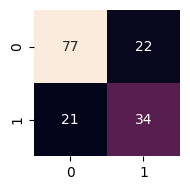

In [68]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

**RandomForest RandomizedSearch Optimization**

In [69]:
hyperparams = {
    'n_estimators': [10,50],
    'bootstrap': [True, False],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": [None, 5, 8],
    "min_samples_split": [2, 5],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    }

model_rand = RandomizedSearchCV(model, hyperparams, scoring = "f1", cv = 5, n_jobs=8)
model_rand

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=8,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 8],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 50]},
                   scoring='f1')

In [70]:
model_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=8,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 8],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 50]},
                   scoring='f1')

In [71]:
random_best = model_rand.best_estimator_

In [72]:
#Train model with new parameters
random_best.fit(X_train, y_train)
y_pred_best = random_best.predict(X_test)
ytrain_best = random_best.predict(X_train)

In [73]:
#Evaluation of the model
accuracy_train_rfo = accuracy_score(y_train, ytrain_best)
f1_train_rfo = f1_score(y_train, ytrain_best)
accuracy_predict_rfo = accuracy_score(y_test, y_pred_best)
f1_test_rfo = f1_score(y_test, y_pred_best)
print(f'Train - After model optimization:\nAccuracy score = {accuracy_train_rfo:.2f}\nF1 score = {f1_train_rfo:.2f}.')
print(f'Test - After model optimization:\nAccuracy score = {accuracy_predict_rfo:.2f}\nF1 score = {f1_test_rfo:.2f}.')

Train - After model optimization:
Accuracy score = 0.94
F1 score = 0.91.
Test - After model optimization:
Accuracy score = 0.75
F1 score = 0.65.


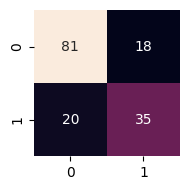

In [74]:
cm_best = confusion_matrix(y_test, y_pred_best)
cm_df = pd.DataFrame(cm_best)
plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

**Training the Model - GradientBoostingClassifier**

In [75]:
model_gb = GradientBoostingClassifier(n_estimators = 20, random_state = 42)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20, random_state=42)

In [76]:
ytrain_gb = model_gb.predict(X_train)
y_pred_gb = model_gb.predict(X_test)

In [77]:
#Evaluation of the model
accuracy_train_gb = accuracy_score(y_train, ytrain_gb)
f1_train_gb = f1_score(y_train, ytrain_gb)
accuracy_predict_gb = accuracy_score(y_test, y_pred_gb)
f1_test_gb = f1_score(y_test, y_pred_gb)

print(f'Train:\nAccuracy score = {accuracy_train_gb:.2f}\nF1 score = {f1_train_gb:.2f}.')
print(f'Test:\nAccuracy score = {accuracy_predict_gb:.2f}\nF1 score = {f1_test_gb:.2f}.')


Train:
Accuracy score = 0.84
F1 score = 0.74.
Test:
Accuracy score = 0.77
F1 score = 0.65.


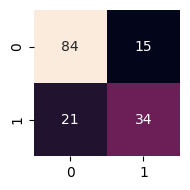

In [78]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
cm_df = pd.DataFrame(cm_gb)
plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

**GradientBoosting RandomizedSearch Optimization**

In [79]:
hyperparams_gb = {
    'n_estimators': [10,50],
    "criterion": ['squared_error', 'friedman_mse'],
    "max_depth": [2,3,4,5,10],
    "min_samples_split": [2, 5],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
    }

gb_optimization = RandomizedSearchCV(model_gb, hyperparams_gb, scoring = "f1", cv = 5, n_jobs=8)
gb_optimization

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(n_estimators=20,
                                                        random_state=42),
                   n_jobs=8,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1],
                                        'max_depth': [2, 3, 4, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 50]},
                   scoring='f1')

In [80]:
gb_optimization.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(n_estimators=20,
                                                        random_state=42),
                   n_jobs=8,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1],
                                        'max_depth': [2, 3, 4, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 50]},
                   scoring='f1')

In [81]:
gb = gb_optimization.best_estimator_

In [82]:
#Train model with new parameters
gb.fit(X_train, y_train)
y_pred_gbo = gb.predict(X_test)
ytrain_gbo = gb.predict(X_train)

In [83]:
#Evaluation of the model
accuracy_train_gbo = accuracy_score(y_train, ytrain_gbo)
f1_train_gbo = f1_score(y_train, ytrain_gbo)
accuracy_predict_gbo = accuracy_score(y_test, y_pred_gbo)
f1_test_gbo = f1_score(y_test, y_pred_gbo)

print(f'Train - After model optimization:\nAccuracy score = {accuracy_train_gbo:.2f}\nF1 score = {f1_train_gbo:.2f}.')
print(f'Test - After model optimization:\nAccuracy score = {accuracy_predict_gbo:.2f}\nF1 score = {f1_test_gbo:.2f}.')

Train - After model optimization:
Accuracy score = 1.00
F1 score = 1.00.
Test - After model optimization:
Accuracy score = 0.72
F1 score = 0.63.


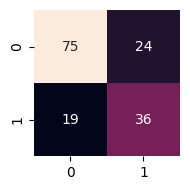

In [84]:
cm_gbo = confusion_matrix(y_test, y_pred_gbo)
cm_df = pd.DataFrame(cm_gbo)
plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

**Training the Model - XGBoostClassifier**

In [85]:
model_xg = XGBClassifier(n_estimators = 20, random_state = 42)
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [86]:
ytrain_xg = model_xg.predict(X_train)
y_pred_xg = model_xg.predict(X_test)

In [87]:
#Evaluation of the model
accuracy_train_xg = accuracy_score(y_train, ytrain_xg)
f1_train_xg = f1_score(y_train, ytrain_xg)
print(f'Accuracy on train data is {accuracy_train_xg:.2f}')
print(f'F1 Score on train data is {f1_train_xg:.2f}')
accuracy_predict_xg = accuracy_score(y_test, y_pred_xg)
f1_test_xg = f1_score(y_test, y_pred_xg)
print(f'Accuracy on test data is {accuracy_predict_xg:.2f}')
print(f'F1 Score on test data is {f1_test_xg:.2f}')

Accuracy on train data is 0.98
F1 Score on train data is 0.97
Accuracy on test data is 0.72
F1 Score on test data is 0.63


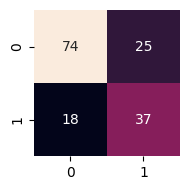

In [88]:
cm_xg = confusion_matrix(y_test, y_pred_xg)
cm_df = pd.DataFrame(cm_xg)
plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

**XGBoost RandomizedSearch Optimization**

In [89]:
hyperparams_xg = {
    'n_estimators': [20,50,100,200],
    "max_depth": [1,2,3,4,5],
    'learning_rate': [0.00001, 0.0001, 0.001,0.01, 0.1]
    }

xg_optimization = RandomizedSearchCV(model_xg, hyperparams_xg, scoring = "f1", cv = 5, n_jobs=8)
xg_optimization

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None, n_estimators=20,
                                           n_jobs=None, num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=8,
                   param_distributions={'learning_rate': [1e-05, 0.0001, 0.001,
                                                          0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [20, 50, 100, 200]},
                   scoring='f1')

In [90]:
xg_optimization.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None, n_estimators=20,
                                           n_jobs=None, num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=8,
                   param_distributions={'learning_rate': [1e-05, 0.0001, 0.001,
                                                          0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [20, 50, 100, 200]},
                   scoring='f1')

In [91]:
xgo = xg_optimization.best_estimator_

In [92]:
#Train model with new parameters
xgo.fit(X_train, y_train)
y_pred_xgo = xgo.predict(X_test)
ytrain_xgo = xgo.predict(X_train)

In [93]:
#Evaluation of the model
accuracy_train_xgo = accuracy_score(y_train, ytrain_xgo)
f1_train_xgo = f1_score(y_train, ytrain_xgo)
accuracy_predict_xgo = accuracy_score(y_test, y_pred_xgo)
f1_test_xgo = f1_score(y_test, y_pred_xgo)

print(f'Train - After model optimization:\nAccuracy score = {accuracy_train_xgo:.2f}\nF1 score = {f1_train_xgo:.2f}.')
print(f'Test - After model optimization:\nAccuracy score = {accuracy_predict_xgo:.2f}\nF1 score = {f1_test_xgo:.2f}.')

Train - After model optimization:
Accuracy score = 0.87
F1 score = 0.81.
Test - After model optimization:
Accuracy score = 0.75
F1 score = 0.65.


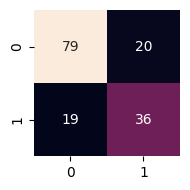

In [94]:
cm_xgo = confusion_matrix(y_test, y_pred_xgo)
cm_df = pd.DataFrame(cm_xgo)
plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

**Comparing all the models**

In [95]:
models_dict = []

for i in models:
    accuracy_train_var = f'accuracy_train_{i}'
    accuracy_train_value = globals()[accuracy_train_var]
    accuracy_predict_var = f'accuracy_predict_{i}'
    accuracy_predict_value = globals()[accuracy_predict_var]
    f1_train_var = f'f1_train_{i}' 
    f1_train_value = globals()[f1_train_var]
    f1_test_var = f'f1_test_{i}' 
    f1_test_value = globals()[f1_test_var]   
    models_dict.append({'Model': i, 'Accuracy Train': accuracy_train_value, 'F1 Score Train': f1_train_value, 'Accuracy Test': accuracy_predict_value, 'F1 Score Test': f1_test_value})

models_df = pd.DataFrame(models_dict)
models_df

,Model,Accuracy Train,F1 Score Train,Accuracy Test,F1 Score Test
0,rf,1.000000,1.000000,0.720779,0.612613
1,rfo,0.941368,0.911765,0.753247,0.648148
2,gb,0.840391,0.742105,0.766234,0.653846
3,gbo,1.000000,1.000000,0.720779,0.626087
4,xg,0.980456,0.971292,0.720779,0.632479
5,xgo,0.874593,0.809877,0.746753,0.648649


In [99]:
models_melted = pd.melt(models_df, id_vars=['Model'], var_name='Metric', value_name='Value')

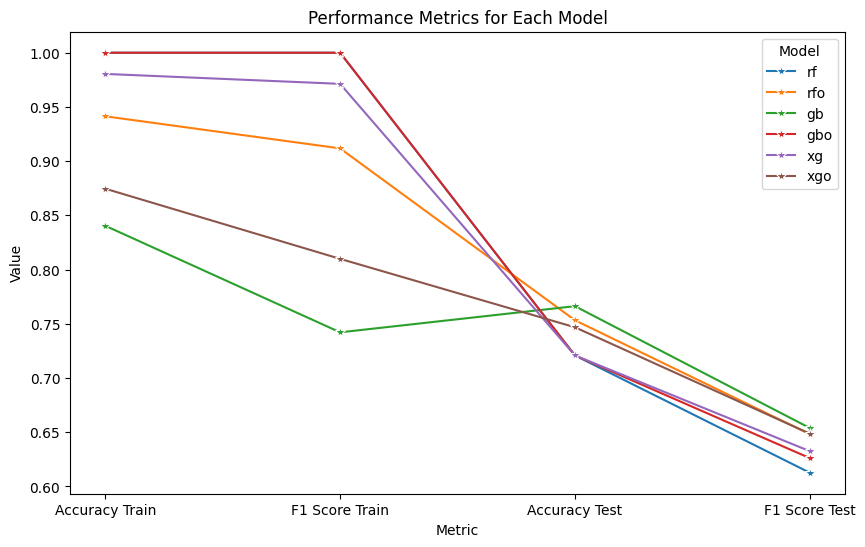

In [97]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Metric', y='Value', hue='Model', data=models_melted, marker='*', markersize=8)
plt.title('Performance Metrics for Each Model')
plt.show()

According to the plot above the best model seems to be the GradientBoosting (green line), that shows a better accuracy and F1 score on the test data. The optimized model ran with XGBoost (brown line) algorithm shows a similar F1 score, inferior accuracy and better performance on the train data. The worst model was RandomForest (blue line), which shows overfitting in the train data and poor performance on the test data.

**Saving the model**

In [100]:
dump(model_gb, open("../models/gradient_boosting_classifier.sav", "wb"))